o	Why do we need different types of layers?
o	What are good network designs for image data?
o	What is a convolutional layer?
o	How can we avoid overfitting?

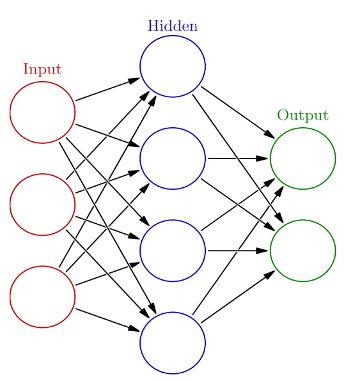

## step 0: Familiarizing ourselves with data

In [3]:
from tensorflow import keras
(train_images, train_labels), (test_images, test_labels) = (
keras.datasets.cifar10.load_data())

In [4]:
len(train_images)

50000

In [5]:
n = 5000
train_images = train_images[:n]
train_labels = train_labels[:n]

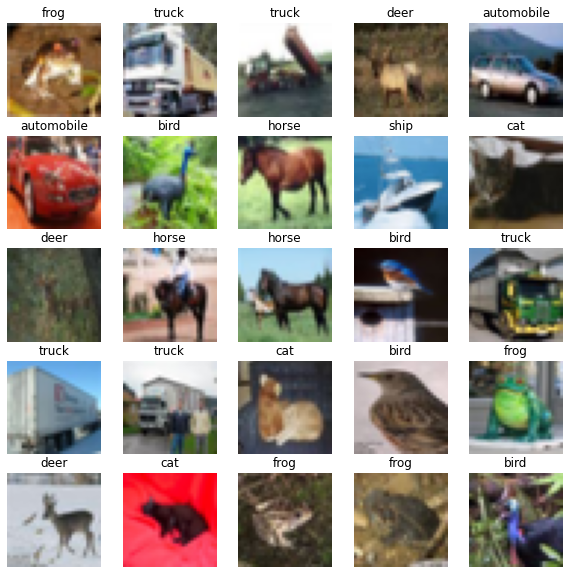

In [7]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(class_names[train_labels[i,0]])
plt.show()


## 1 Formulate the problem
Predicting the class for a given image

## 2 Identify inputs and outputs
Input: 2D image with colours, Output: the class, one of 10 classes

#### Exercise: Explore the data

 Familiarize yourself with the CIFAR10 dataset. To start, consider the following questions:
 - What is the dimension of a single data point? What do you think the dimensions mean?
 - What is the range of values that your input data takes?
 - What is the shape of the labels, and how many labels do we have?

Write your answers in the collaborative notebook.

In [8]:
train_images.shape

(5000, 32, 32, 3)

In [9]:
train_images.min(), train_images.max()

(0, 255)

In [10]:
train_labels.shape

(5000, 1)

In [11]:
train_labels.min(), train_labels.max()

(0, 9)

## 3 Prepare the data

### Scaling the data

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
train_images.min(), train_images.max()

(0.0, 1.0)

## 4 Choose a pre-trained model or build a new architecture from scratch
OK, we should use a state of the art convolutional neural network (or transformer)

## Intution about convoluional neurl layers

In [14]:
dim = train_images.shape[1] * train_images.shape[2] * train_images.shape[3]

In [15]:
dim

3072

Suppose we create a single Dense (fully connected) layer with 100 hidden units that connect to the input pixels, how many parameters does this layer have?



In [17]:
3072 * 100 # only the weights of the connections
3072 * 100 + 100 # the weights of the connections + the biases

307300

## Convolutional layer
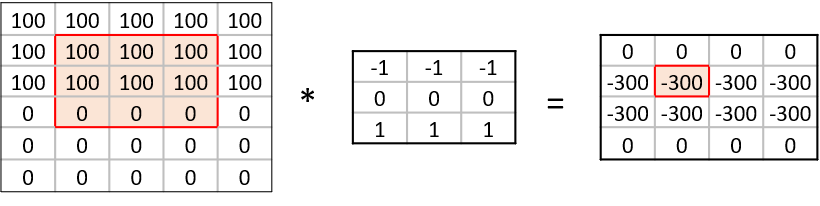
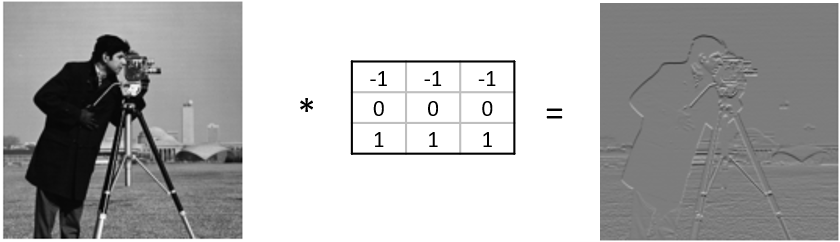

#### Exercise: Convolutional neural networks
In groups of 3/4, answer the following questions. Write your answers in the collaborative document.

##### 1. Border pixels
What, do you think, happens to the border pixels when applying a convolution?
##### 2. Number of parameters
Suppose we apply a convolutional layer with 100 kernels of size 3 * 3 * 3 (the last dimension applies to the rgb channels) to our images of 32 * 32 * 3 pixels. How many parameters do we have? Assume, for simplicity, that the kernels do not use bias terms. Compare this to the answer of the previous exercise
##### 3. A small convolutional neural network
So let’s look at a network with a few convolutional layers. We need to finish with a Dense layer to connect the output cells of the convolutional layer to the outputs for our classes.
```python=
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model.summary()
```
Inspect the network above:

* What do you think is the function of the Flatten layer?
* Which layer has the most parameters? Do you find this intuitive?

In [18]:
3 * 3 *3

27

In [19]:
27 * 100

2700

In [22]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model.summary()

Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 50)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 50)        22550     
                                                                 
 flatten_2 (Flatten)         (None, 8450)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                84510     
                                                 

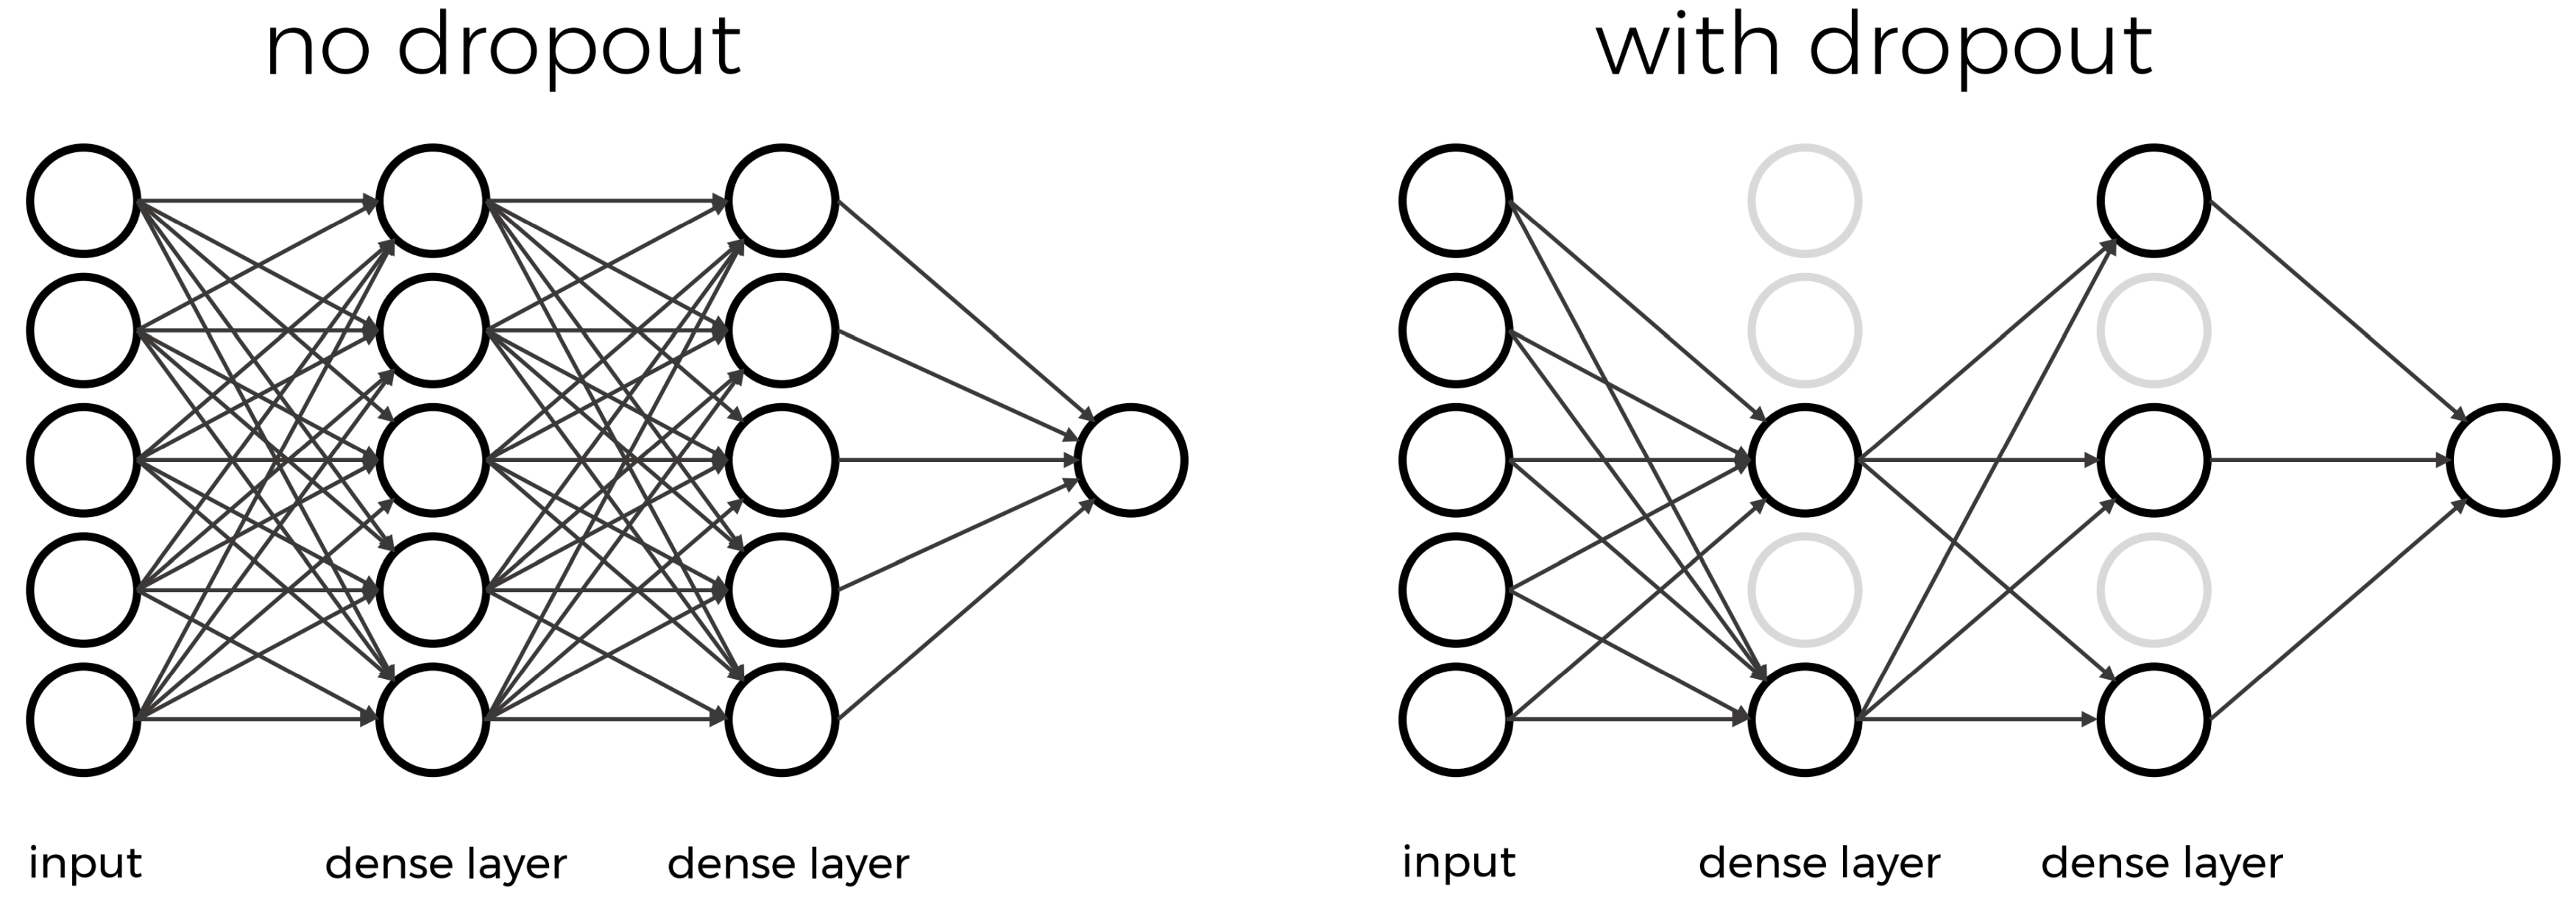